Decison for indicator

Secondary: NV.IND.TOTL.ZS https://data.worldbank.org/indicator/NV.IND.TOTL.ZS?view=chart
Primary: ER.H2O.FWIN.ZS https://data.worldbank.org/indicator/ER.H2O.FWIN.ZS

The basic assumption is that a similar content of % GDP of industry lead to a similar & of total water withdrawl of industry

Here we load the data

In [33]:
import wbgapi as wb


data = wb.data.DataFrame(['ER.H2O.FWIN.ZS','NV.IND.TOTL.ZS'], time=[2020] )



In [32]:
import pandas as pd

import numpy as np
# Get information about all economies (countries and regions)
#all_economies = wb.economy.Series(id='all')
def region_cleaner(data):
    economies = wb.economy.DataFrame()
    aggregates_id = economies[economies['aggregate'] == True]
    data_clean = data.loc[data.index.difference(aggregates_id.index)]

    data_clean_name = data_clean.join(economies['name'], on = data_clean.index, how = 'inner')
    data_clean_name.set_index('name', append=True, inplace =True)

    data_clean_name =data_clean_name.drop(columns='key_0')

    return data_clean_name

def nan_checker(data):
    return data.isna().sum()


print(region_cleaner(data))



                  ER.H2O.FWIN.ZS  NV.IND.TOTL.ZS
    name                                        
ABW Aruba                    NaN             NaN
AFG Afghanistan         0.831988       14.031699
AGO Angola             33.947294       45.678242
ALB Albania             2.035623       20.114530
AND Andorra                  NaN       12.660158
...                          ...             ...
XKX Kosovo                   NaN       27.558457
YEM Yemen, Rep.         1.823282             NaN
ZAF South Africa       21.313440       23.272787
ZMB Zambia              8.269720       40.257899
ZWE Zimbabwe            2.157087       32.767517

[217 rows x 2 columns]


In [3]:
def set_split(data_not_clean):
    data = region_cleaner(data_not_clean)
    data_new = data[~data['NV.IND.TOTL.ZS'].isna() & ~data['ER.H2O.FWIN.ZS'].isna()]
    #data_new=  data[~data['NV.IND.TOTL.ZS'].isna() & data['ER.H2O.FWIN.ZS'].isna()]

    return data_new


print(set_split(data))

                                    ER.H2O.FWIN.ZS  NV.IND.TOTL.ZS
    name                                                          
AFG Afghanistan                           0.831988       14.031699
AGO Angola                               33.947294       45.678242
ALB Albania                               2.035623       20.114530
ARE United Arab Emirates                  0.742776       42.174043
ARG Argentina                            10.587612       22.180573
...                                            ...             ...
VCT St. Vincent and the Grenadines        0.023524       12.597134
VNM Vietnam                               3.747409       36.743712
ZAF South Africa                         21.313440       23.272787
ZMB Zambia                                8.269720       40.257899
ZWE Zimbabwe                              2.157087       32.767517

[171 rows x 2 columns]


C:\Users\admin\Documents\GitHub\Sustanal\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Documents\GitHub\Sustanal\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


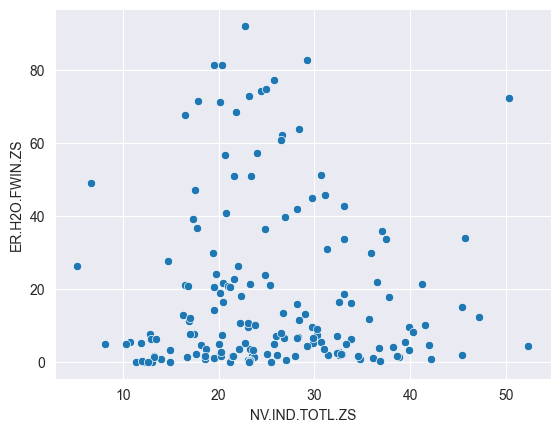

C:\Users\admin\Documents\GitHub\Sustanal\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Documents\GitHub\Sustanal\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


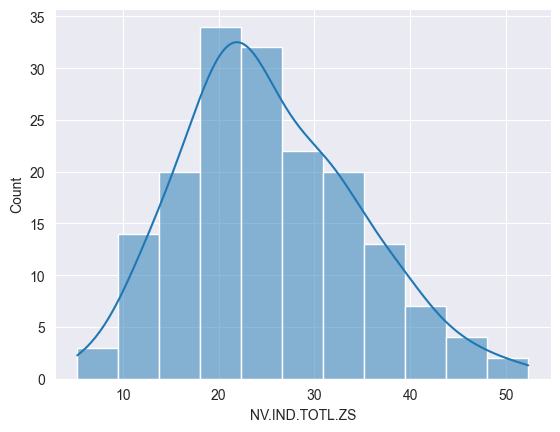

C:\Users\admin\Documents\GitHub\Sustanal\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Documents\GitHub\Sustanal\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


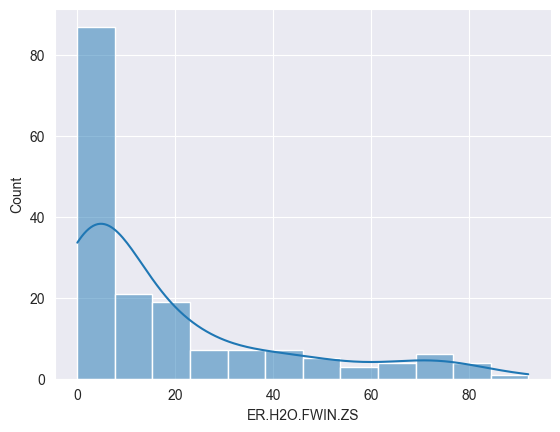

In [36]:
import seaborn as sns

import matplotlib.pyplot as plt

def plot_stuff(data):
    data = set_split(data)
    industry_share = data['NV.IND.TOTL.ZS']
    water_share = data['ER.H2O.FWIN.ZS']


    sns.scatterplot(x =industry_share, y = water_share)
    plt.savefig('graphs\scatter_init.jpeg')
    plt.show()
    plt.close()
    sns.histplot(industry_share, kde=True)
    plt.savefig('graphs\indust_distrib.jpeg')
    plt.show()
    plt.close()
    sns.histplot(water_share, kde=True)
    plt.savefig('graphs\water_distrib.jpeg')
    plt.show()
    plt.close()


plot_stuff(data)




In [29]:
from sklearn.impute import SimpleImputer, KNNImputer


def imput_calc(data):

    data = region_cleaner(data)


    y = data['ER.H2O.FWIN.ZS']
    X =  data['NV.IND.TOTL.ZS']

    imputer = SimpleImputer(strategy='mean')

    data['H20_imputed_simple'] = imputer.fit_transform(y.values.reshape(-1, 1))

    knn_imputer_uniform = KNNImputer(n_neighbors=10, weights='uniform')

    data['H20_imp_k_uni'] = knn_imputer_uniform.fit_transform(
    np.column_stack((X, y)))[:,1]

    knn_imputer_dist = KNNImputer(n_neighbors=10, weights='distance')

    data['H20_imp_k_dist'] = knn_imputer_dist.fit_transform(
    np.column_stack((X, y)))[:,1]


    return data

print(imput_calc(data))




                  ER.H2O.FWIN.ZS  NV.IND.TOTL.ZS  H20_imputed_simple  \
    name                                                               
ABW Aruba                    NaN             NaN           18.153829   
AFG Afghanistan         0.831988       14.031699            0.831988   
AGO Angola             33.947294       45.678242           33.947294   
ALB Albania             2.035623       20.114530            2.035623   
AND Andorra                  NaN       12.660158           18.153829   
...                          ...             ...                 ...   
XKX Kosovo                   NaN       27.558457           18.153829   
YEM Yemen, Rep.         1.823282             NaN            1.823282   
ZAF South Africa       21.313440       23.272787           21.313440   
ZMB Zambia              8.269720       40.257899            8.269720   
ZWE Zimbabwe            2.157087       32.767517            2.157087   

                  H20_imp_k_uni  H20_imp_k_dist  
    name     

C:\Users\admin\Documents\GitHub\Sustanal\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Documents\GitHub\Sustanal\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Documents\GitHub\Sustanal\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Documents\GitHub\Sustanal\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

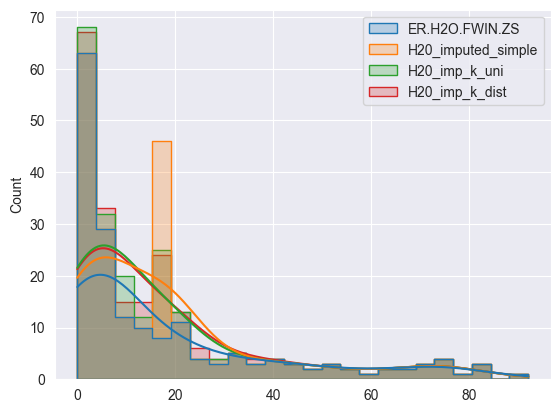

In [30]:
sns.histplot(imput_calc(data).iloc[:,[0,2,3,4]], element='step', common_norm = False, kde = True)
plt.savefig('graphs\histplot.jpeg')

Analysis:
1. imputed simple is definetly problematic because it skews the distribution quite tremendously obiously because we take the average. You can assess this best in the skewed distribution H20 in direction of higher values.
2.


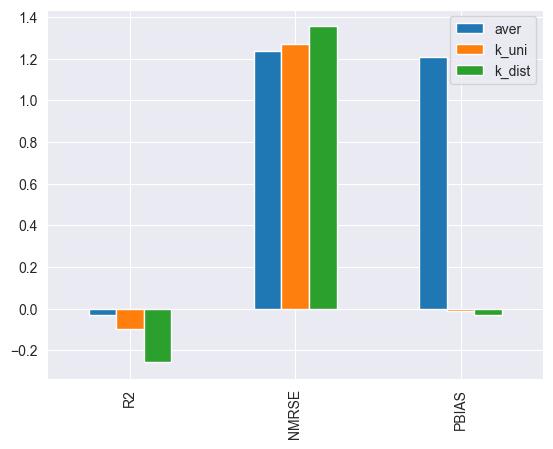

In [43]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import numpy as np

def imp_valid(data, n_folds=5):

    scores ={'aver':{'R2':[], 'NMRSE':[], 'PBIAS':[] },'k_uni':{'R2':[], 'NMRSE':[], 'PBIAS':[] },'k_dist':{'R2':[], 'NMRSE':[], 'PBIAS':[] }}

    data = set_split(data)

    # Perform imputations and model evaluation over multiple runs

    # Initialize a k-fold cross-validation splitter
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    data_copy = data.copy()
    y = np.array(data['ER.H2O.FWIN.ZS'])
    X = np.array(data['NV.IND.TOTL.ZS'])

    for imp_switch in ['aver', 'k_uni', 'k_dist']:

        for train_index, test_index in kf.split(data):

            # Set NaN values in the 'ER.H2O.FWIN.ZS' column for the test index
            y_test = y.copy()
            y_test[test_index] = np.NaN

            if imp_switch == 'aver':
                imputer = SimpleImputer(strategy='mean')
                y_imp = imputer.fit_transform(y_test.reshape(-1, 1))

            elif imp_switch == 'k_uni':

                knn_imputer_uniform = KNNImputer(n_neighbors=10, weights='uniform')
                y_imp = knn_imputer_uniform.fit_transform(np.column_stack((X, y_test)))[:,1]

            elif imp_switch == 'k_dist':

                knn_imputer_dist = KNNImputer(n_neighbors=10, weights='distance')

                y_imp = knn_imputer_dist.fit_transform(np.column_stack((X, y_test)))[:,1]


            scores[imp_switch]['R2'].append(r2_score(y[test_index], y_imp[test_index]))
            scores[imp_switch]['NMRSE'].append(np.sqrt(mean_squared_error(y[test_index],
                                                                          y_imp[test_index]))/np.mean(y[test_index]))
            scores[imp_switch]['PBIAS'].append(((y_imp[test_index]-y[test_index]).sum()
                                                    /y[test_index].sum()))

        scores[imp_switch]['R2'] = np.mean(np.array(scores[imp_switch]['R2']))
        scores[imp_switch]['NMRSE'] = np.mean(np.array(scores[imp_switch]['NMRSE']))
        scores[imp_switch]['PBIAS'] = np.mean(np.array(scores[imp_switch]['PBIAS']))

    return pd.DataFrame.from_dict(scores)



imp_valid(data).plot(kind='bar')
plt.savefig('graphs\Validation.jpeg')




* R2: Outcome is quite devistating. None of the models fits the real data well. R2 interpretation the variance in the observed data cannot be adressed by the model-> Taking the average of th H20 would be the fit with least variance.
* NMRSE is far away from zero which indicates a bad fit
* aver is biased towards higher values = overfit. This could be also nicely assessed in the distribution
* K_uni and K-kist tend to underfit however they have both a very small bias of <3%
* As a result K_uni and K_aver are not biased but are highly affected by fluctuations in the test data
* If you have to choose chosse K_uni

# Task 6

In [26]:

def output_to_xlsx(data):
    imp_data = imput_calc(data)
    valid_data = imp_valid(data)
    # Create an ExcelWriter object and specify the Excel file name
    file_name = 'data\output.xlsx'
    with pd.ExcelWriter(file_name) as writer:
        imp_data.to_excel(writer, sheet_name='imputed_data')
        valid_data.to_excel(writer, sheet_name='validation_imputation')



 sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)[source]¶

(coefficient of determination) regression score function.

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). In the general case when the true y is non-constant, a constant model that always predicts the average y disregarding the input features would get a

score of 0.0.

In the particular case when y_true is constant, the

score is not finite: it is either NaN (perfect predictions) or -Inf (imperfect predictions). To prevent such non-finite numbers to pollute higher-level experiments such as a grid search cross-validation, by default these cases are replaced with 1.0 (perfect predictions) or 0.0 (imperfect predictions) respectively. You can set force_finite to False to prevent this fix from happening.

Note: when the prediction residuals have zero mean, the
score is identical to the Explained Variance score.

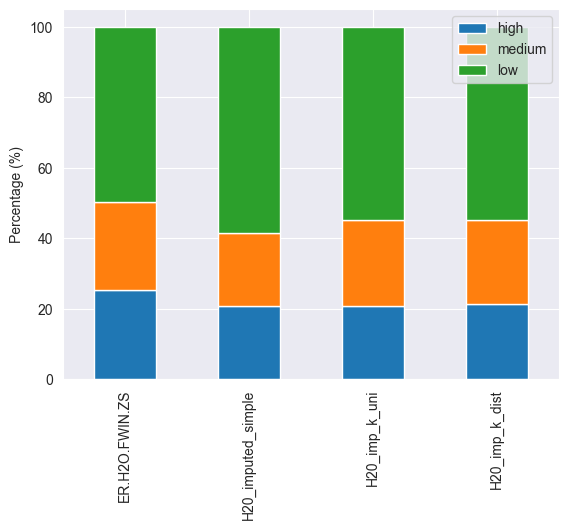

In [72]:
def indic_selection(prim = 'ER.H2O.FWIN.ZS', sec = 'NV.IND.TOTL.ZS'):

    return {'prim':prim, 'sec':sec }


def clustering(data):

    data = imput_calc(data)

    data.pop(indic_selection()['sec'])


    #cat 1: < median -> high sust
    #threshold 2: median =< VALUE =< average -> medium sust
    #threshold 3: value >average -> high sust
    #
    ser = data['ER.H2O.FWIN.ZS']
    ser = ser[~ser.isna()]

    thres1 = np.percentile(ser, 25)
    thres2 = np.percentile(ser, 50)

    dict_ = {key for key in data.columns}

    dict_bar = {}
    for column in data.columns:
        dict_bar[column] = []
        mask_high = data[column] < thres1
        mask_medium =   (data[column] >= thres1) & (data[column] <= thres2)
        mask_low = data[column] > thres2
        dict_bar[column].append(data[column][mask_high].describe()['count'])
        dict_bar[column].append(data[column][mask_medium].describe()['count'])
        dict_bar[column].append(data[column][mask_low].describe()['count'])

    df = pd.DataFrame.from_dict(dict_bar)
    df.index = ['high', 'medium','low']

    return df, thres2


result_df, t = clustering(data)
result_df_percentage = result_df.div(result_df.sum(axis=0), axis=1) * 100

result_df_percentage.T.plot(kind='bar', stacked=True)
plt.ylabel('Percentage (%)')
plt.savefig('graphs\porportion_classes')




In [71]:
series = imput_calc(data)['ER.H2O.FWIN.ZS']

series = series [~series.isna()]

np.percentile(series,10)



0.5063331061599999